Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Accuracy: 0.5384615384615384


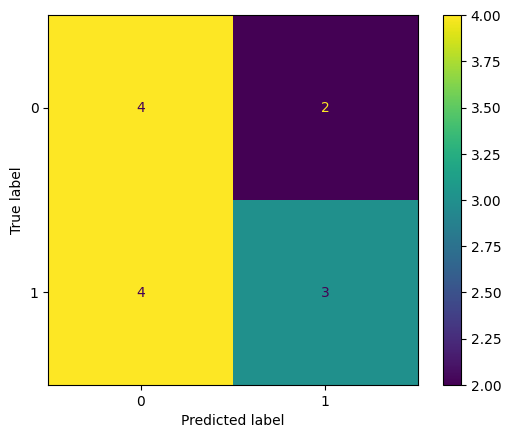

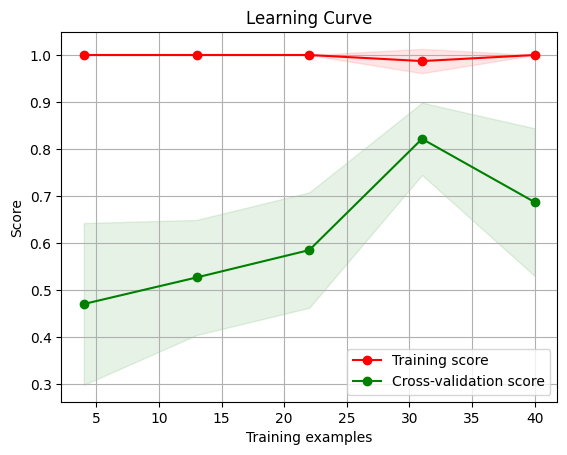

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier
from icecream import ic
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, learning_curve

def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Prepare data
df = pd.read_csv('data/dataset_2.csv', dtype={'V1': str, 'target': int})
df = shuffle(df)

X = []
y = []

for row in df.iterrows():
    i = row[1]['V1']
    o = row[1]['target']
    
    b = list(map(int, i)) # Convert each string element to an integer
    X.append(b)
    y.append(o)
    
split_ratio = 0.8
X_split_index = int(len(X) * split_ratio)
y_split_index = int(len(y) * split_ratio)

X_train = X[:X_split_index]     # First 80% of the data
y_train = y[:y_split_index]     # First 80% of the labels
X_test = X[X_split_index:]      # Remaining 20% of the data
y_test = y[y_split_index:]      # Remaining 20% of the labels


mlp = MLPClassifier(
    hidden_layer_sizes=(4), 
    activation='relu', 
    solver='adam',
    max_iter=200,
    learning_rate='adaptive'
)
parameter_space = {
    'hidden_layer_sizes': [(5,), (10,), (5,5), (10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 1000],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=3, cv=5)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)
# print('Best score found:\n', clf.best_score_)

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Learning Curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

best_estimator = clf.best_estimator_
plot_learning_curve(best_estimator, X_train, y_train, cv=5, n_jobs=3)
plt.show()

